# Roots of Equations

In this lecture we discussed different techniques to determine the *root* of a non-linear function of one variable ($f(x)=0$). 

The root of a linear functions can be solved analytically. Trivially,
\begin{equation}
f(x)=ax-b=0,
\end{equation}
has the simple solution $x=b/a$. 

Similarly, for a quadratic function there is also a straightforward answer:
\begin{equation}
f(x)=ax^2+bx+c=0, {\rm for}\\
x={{-b\pm\sqrt{b^2-4ac}}\over{2a}}
\end{equation}
For other non-linear functions this is sometimes possible, but in the most general case it is hard to write down a simple solution (sometimes a series expansions give you an analytical answer, but still this would require a computer to calculate it with the appropriate accuracy for you). In these cases you need a computer.

In the following lectures, we will first focus on numerically finding the roots of a function of one variable, i.e., $f(x)=0$. These root solving methods also can be used for finding the extrema of a function. Instead of solving for the roots of $f(x)$, solving the roots the derivative $f′(x)$ function, yields the local or global extrema of the function $f(x)$.

## Statement of the problem

The basic problem addressed by root finding is simple. We want to find the value(s) of $x^*$ for which:
\begin{equation}
f(x^*)=0.
\end{equation}

Example function
\begin{equation}
f(x)=e^{x-\sqrt{x}}-x
\end{equation}

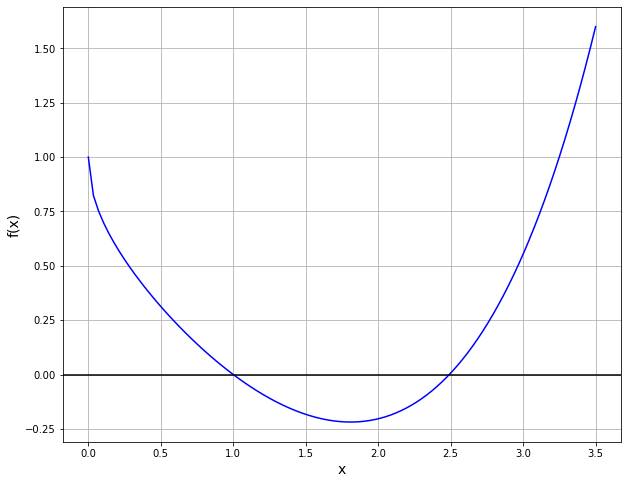

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def f(x):
    return np.exp(x-np.sqrt(x))-x

x=np.linspace(0.,3.5,100) 

plt.figure(figsize=(10,8))
plt.xlabel('x', fontsize=14) 
plt.ylabel('f(x)', fontsize=14) 
plt.plot(x,f(x), '-b') 
plt.axhline(y=0,color='black')
plt.grid()
plt.show()

## Methods
There are two main classes of root-finding methods:
1) Bracketing methods
2) Non-bracketing methods



**Bracketing methods:** Using these methods, you need to provide two initial 'guesses'/starting points on either side of the root. Of these, we will discuss the bisection (or binary search) method.

**Non-bracketing methods:** Using these methods, you need to provide one or two starting points. If two points are needed, the points do not need to be on either side of the root. We will discuss the secant method, and Newton's (or the Newton-Raphson) method. 

### Bisection method

The bisection method is one of the simplest methods for finding zeros of a non-linear function. It is guaranteed to find a root - but it can be slow. The main idea comes from the intermediate value theorem: If $f(a)$ and $f(b)$ have different signs and $f$ is continuous, then $f$ must have a zero between $a$ and $b$.

We evaluate the function at the midpoint, $c=1/2(a+b)$. $f(c)$ is either zero, has the same sign as $f(a)$ or the same sign as $f(b)$. Suppose $f(c)$ has the same sign as $f(a)$ (as pictured below). We then repeat the process on the interval $[c,b]$.

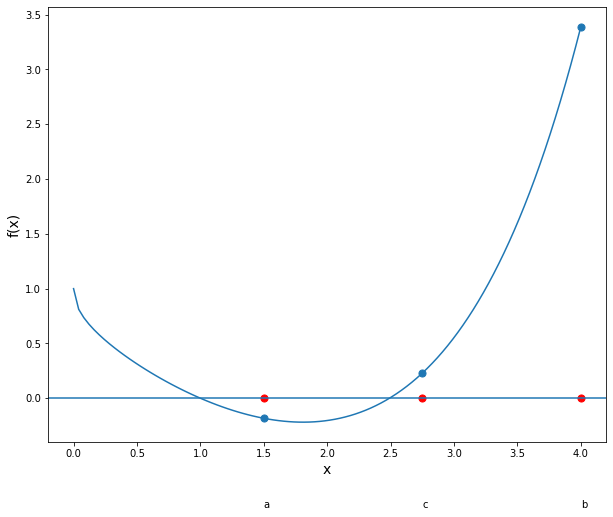

In [5]:

x = np.linspace(0, 4, 100)
plt.figure(figsize=(10,8))
plt.plot(x, f(x))

a = 1.5
b = 4
c = 0.5*(a+b)

plt.text(a,-1,"a")
plt.text(b,-1,"b")
plt.text(c,-1,"c")

plt.scatter([a,b,c], [f(a), f(b),f(c)], s=50)
plt.scatter([a,b,c], [0,0,0], s=50, c='red')

xaxis = plt.axhline(0)
plt.xlabel('x', fontsize=14) 
plt.ylabel('f(x)', fontsize=14) 

plt.show()

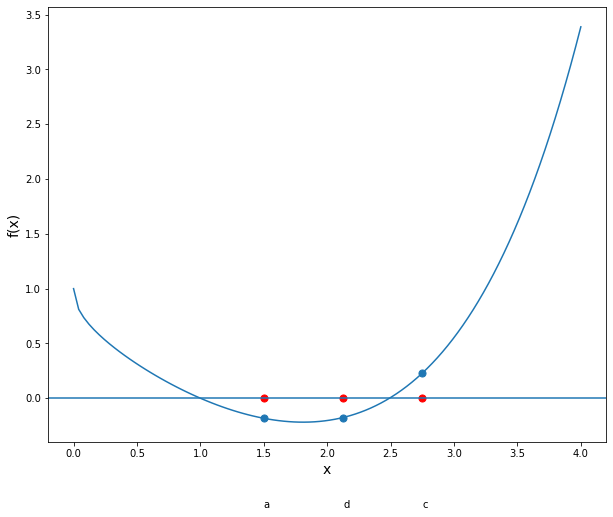

In [9]:
plt.figure(figsize=(10,8))
plt.plot(x, f(x))

d = 0.5*(a+c)

plt.text(d,-1,"d")
plt.text(a,-1,"a")
plt.text(c,-1,"c")

plt.scatter([d,a,c], [f(d), f(a),f(c)], s=50)
plt.scatter([d,a,c], [0,0,0], s=50, c='red')

xaxis = plt.axhline(0)
plt.xlabel('x', fontsize=14) 
plt.ylabel('f(x)', fontsize=14) 

plt.show()

We can terminate the process whenever the function evaluated at the new midpoint is ‘close enough’ to zero. As mentioned before, this method is thus an example of the ‘bracketing methods’. This means the root is *bracketed* by the end-points (it is somewhere in between). 

The other class of methods are ‘non-bracketing methods’ - the root need not be somewhere in between the end-points (but it usually needs to be close!)

<font color='red'>Class exercise: Write an algorithm for the Bisection method </font>

The algorithm we came up with was:

- Step 1. Bracket the root. Define a, b where $f(a)f(b) < 0$.
- Step 2. First guess for the root: $x^{(0)} = (a+b)/2$
- Step 3. Check sub-intervals (a, $x^{(0)}$ )  and ($x^{(0)}$, b). If $f(a)f($x^{(0)}$) < 0$: this is the sub-interval for the next iteration, else choose the other sub-interval.
- Step 4. Repeat until the steps you are making are tiny: $|x^{(k)} - x^{(k-1)}| < \epsilon$.

Bisection method properties:
    
- Pros: Sure to converge.
- Cons: Slow to converge (linear convergence). See 5.2.4 Bisection method in the numerical methods book for a proof of the linear convergence.

### Newton's (Newton-Raphson) method

This method requires that the function is differentiable. If that is the case, we can use the differential to further optimize the root finding. We also do not need to provide two initial guesses.

In short this method says: `if the function were a line, where would it cross the x axis'? And then defines the guess of the root to be that point. It then iterates this same process until convergence is reached.


We define the exact  *root* as $x^*$ and we define $h=x^*-x_0$, where $x_0$ is our initial guess (not too far from the root). Then:
\begin{equation}
f(x^*)=0\\
= f(x_0 + h)\\
\approx f(x_0) + h f'(x_0)
\end{equation}
This implies that
\begin{equation}
h\approx-{{f(x_0)}\over{f'(x_0)}}.
\end{equation}

If we then set our next guess $x_1$ to be:
\begin{equation}
x_1=x_0-{{f(x_0)}\over{f'(x_0)}}
\end{equation}
we can iterate until we reach (close to) the root using:
\begin{equation}
x_n=x_{n-1}-{{f(x_{n-1})}\over{f'(x_{n-1})}}
\end{equation}

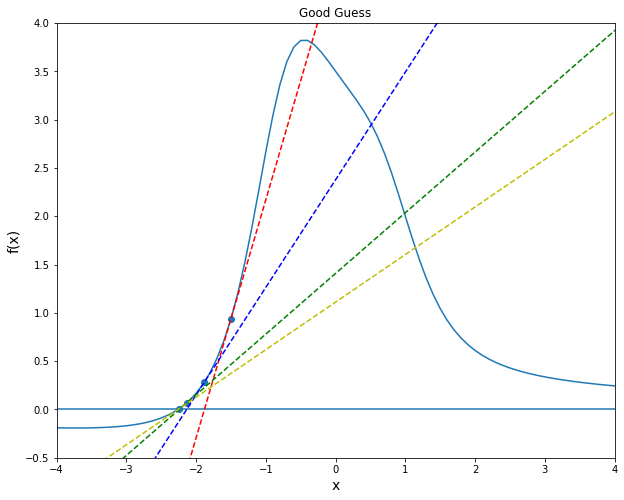

In [7]:
x = np.arange(-5,5, 0.1);
y = (x**3-2*x+7)/(x**4+2)

plt.figure(figsize=(10,8))
p1=plt.plot(x, y)
plt.xlim(-4, 4)
plt.ylim(-.5, 4)
plt.axhline(0)
plt.title('Good Guess')
t = np.arange(-5, 5., 0.1)

x0=-1.5 # Our initial guess

xvals = []
xvals.append(x0)
notconverge = 1
count = 0
cols=['r--','b--','g--','y--','c--','m--','k--','w--']
while (notconverge==1 and count <  4):
    funval=(xvals[count]**3-2*xvals[count]+7)/(xvals[count]**4+2)
    slope=-((4*xvals[count]**3 *(7 - 2 *xvals[count] + xvals[count]**3))/(2 + xvals[count]**4)**2) + (-2 + 3 *xvals[count]**2)/(2 + xvals[count]**4)

    intercept=-slope*xvals[count]+(xvals[count]**3-2*xvals[count]+7)/(xvals[count]**4+2)

    plt.plot(t, slope*t + intercept, cols[count])
    nextval = -intercept/slope
    if abs(funval) < 0.01:
        notconverge=0
    else:
        xvals.append(nextval)
    count = count+1

plt.scatter(xvals,f(np.array(xvals)))
plt.xlabel('x', fontsize=14) 
plt.ylabel('f(x)', fontsize=14) 

plt.show()

The Newton-Raphson method converges quadratically. However, this method has a flaw: it may not always converge.

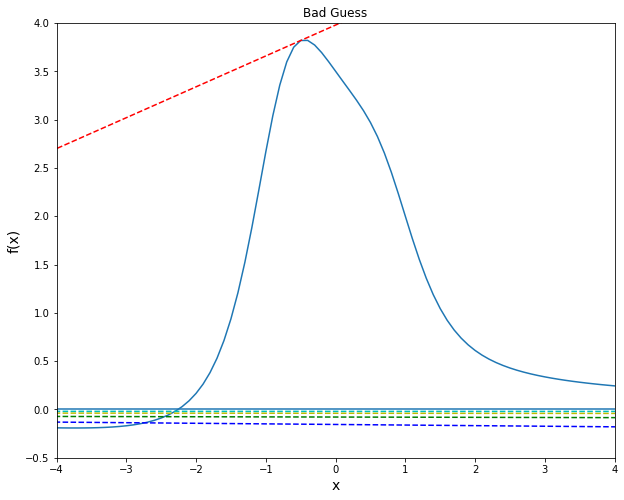

In [8]:
x = np.arange(-5,5, 0.1);
y = (x**3-2*x+7)/(x**4+2)

plt.figure(figsize=(10,8))
p1=plt.plot(x, y)
plt.xlim(-4, 4)
plt.ylim(-.5, 4)
plt.axhline(0)
plt.title('Bad Guess')
t = np.arange(-5, 5., 0.1)

x0=-0.5
xvals = []
xvals.append(x0)
notconverge = 1
count = 0
cols=['r--','b--','g--','y--','c--','m--','k--','w--']
while (notconverge==1 and count <  6):
    funval=(xvals[count]**3-2*xvals[count]+7)/(xvals[count]**4+2)
    slope=-((4*xvals[count]**3 *(7 - 2 *xvals[count] + xvals[count]**3))/(2 + xvals[count]**4)**2) + (-2 + 3 *xvals[count]**2)/(2 + xvals[count]**4)

    intercept=-slope*xvals[count]+(xvals[count]**3-2*xvals[count]+7)/(xvals[count]**4+2)

    plt.plot(t, slope*t + intercept, cols[count])
    nextval = -intercept/slope
    if abs(funval) < 0.01:
        notconverge = 0
    else:
        xvals.append(nextval)
    count = count+1
    
plt.xlabel('x', fontsize=14) 
plt.ylabel('f(x)', fontsize=14)
plt.show()

### Convergence

As you have seen by now, solving the root problem numerically is generally an iterative problem. We thus need to define a termination criterium and we are interested to know the rate of conversions for different methods.

Since we aim to find the root, we expect (hope) that eventually our 'guesses' for the root $x_n$ will approach the true root $x^*$. The final steps should get progressively 'closer' to $x^*$. If there is a constant $m\neq0$ and a number $p$ such that:
\begin{equation}
|x_n-x^*| \leq m|x_{\rm n-1}-x^*|^p
\end{equation}
when $n$ is sufficiently large, then $m$ is called the *asymptotic error constant* and $p$ the *order of convergence*. If $p=1$ the method is *linearly convergent*, if $p=2$ it is *quadratically convergent* and when $p$ is in between it is *superlinearly* convergent.

Of course we do not know the true value of $x^*$. So although what we want to do is define a value of $|x_n-x^*|$ that, for your needs, is accurate enough to stop the iteration, we instead generally define a tolerance such that:
\begin{equation}
{{|x_n - x_{n-1}|}\over{|x_n|}}\leq\epsilon
\end{equation}

But note that, for small numbers, this can also go very wrong. In that case you can define for example an *absolute* tolerance criteria $({|x_n - x_{n-1}|}\leq\epsilon)$.

### Convergence of the different methods

**Bisection method:** In the bisection method, per definition, our intervals in each iteration are always half that of the previous iteration. And because we start with an interval of length $|b-a|$, this means that:
\begin{equation}
|x_n-x^*| \leq {{|b-a|}\over{2^{n+1}}}
\end{equation}
Or, written as our convergence formula:
\begin{equation}
|x_n-x^*| \leq 1/2 |x_{\rm n-1}-x^*|^1
\end{equation}
Hence, $m=1/2$ and $p=1$ for the bisection method.

**Newton's method:** <font color='red'>Blackboard derivation of the convergence of Newton's method.</font>

### Roots of polynomials: when functions have multiple roots

When your equation has multiple roots, the normal roots finding methods require special implementations. They will find a single root. With bracketing methods, it would be possible to adapt the method if you have good guesses for the location of the roots. This will also often be the case for the non-bracketing methods, but they might also lead you to the same root, even when picking a different starting value.

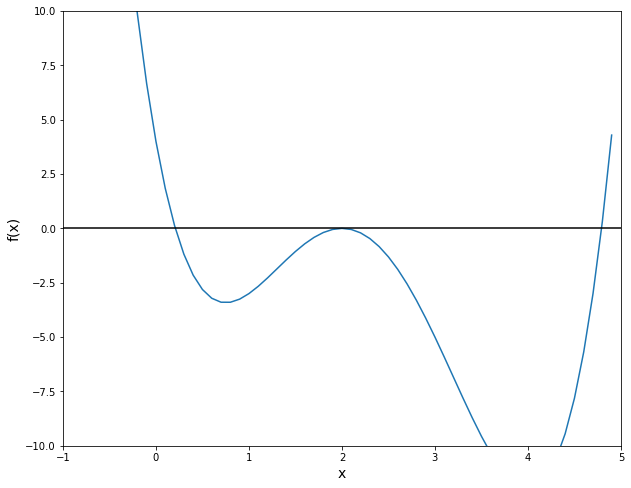

In [11]:
def f(x):
    return (x**4-9*x**3+25*x**2-24*x+4)

x = np.arange(-1,5, 0.1);

plt.figure(figsize=(10,8))
p1=plt.plot(x, f(x))
plt.xlim(-1, 5)
plt.ylim(-10,10)
plt.axhline(0, color='black')

plt.xlabel('x', fontsize=14) 
plt.ylabel('f(x)', fontsize=14) 
plt.show()

<font color='red'> Class discussion: when will these methods fail? </font>

* If multiple roots?
* If $f'(x)$ is also zero, Newton's method isn't applicable, while the function doesn't change sign so neither is the bisection method..
* If $f'(x^*)$ is very small, the function crosses the x axis slowly and the problem is ill-defined.
* If $f'$ is undefined or unknown.

### Roots of polynomials: Eigenvalue approach

Fortunately, there is a straightforward way to determine the multiple roots from a polynomial by performing matrix calculations. It is possible to define a *companion matrix* for which the Eigenvalues are exactly the roots of the polynomial. And as you've learned to calculate a matrix eigenvalues, you can thus determine the roots.

<font color='red'>Blackboard derivation of Eigenvalue approach using the *companion matrix*</font>

The polynomial we wish to find roots for is a monic polynomial (has coefficient = 1 for the highest power of x):
\begin{equation}
f(x)=x^n-c_{n-1}x^{n-1}+...+c_2 x^2 + c_1 x + c_0.
\end{equation}

We define what is known as a Companion matrix:
\begin{equation}
{\bf C} =  \begin{bmatrix}
0 & 1 & 0 & ... & 0 \\
0 & 0 & 1 & ... & 0 \\
0 & 0 & 0 & ... & 0 \\
0 & 0 & 0 & ... & 1 \\
-c_0 & -c_1 & ... & -c_{n-2} & -c_{n-1} \\
   \end{bmatrix}
\end{equation}

<font color='red'>Class exercise: show that C has eigenvector the following vector and that C's eigenvalues are the roots $x^*$ of the polynomial f.</font>

\begin{equation}
{\bf v} =  \begin{bmatrix}
1  \\
x^*  \\
(x^*)^2  \\
.  \\
.\\
.\\
(x^*)^{(n-1)} \\
   \end{bmatrix}
\end{equation}